<a href="https://colab.research.google.com/github/mehdi-or/203B/blob/master/Meta_data_making_(MNIST%2Cetc).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import csv
from keras.datasets import cifar10, mnist
from scipy.spatial.distance import cdist

mounting the Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Function for importing the data

In [ ]:
def class_diagonal(categ, corr, num_trials, test_label):

  diag_index = range(num_trials) # to find the index of the diagonals of the test-set matrix
  corr_zero = np.copy(corr)
  corr_zero[diag_index, diag_index]=0 # to remove the auto-correlaiton of the trials
  corr_df = pd.DataFrame(corr_zero) # turning it to DataFrame to make my life easier by ALOT
  corr_df.columns=test_label # to name the columns of the correlation
  corr_df.index = test_label # to name the rows of the correlation
  unique_class = np.unique(test_label) # to find what uniqw classes we have in the test-set
  class_matrix_corr = np.zeros((len(unique_class),len(unique_class))) # this is the correlation of the mean values of the classes
  #trial_matrix_corr = np.zeros(corr.shape) # this is the correlation of every trials based on the arranged categories
  #trial_matrix_corr =np.zeros(corr.shape) # this is the correlation of every trials based on the arranged categories

  for i, row in enumerate(categ):
    for j, column in enumerate(categ):
      #trial_matrix_corr [row, column]=  corr_df.loc[row][column]
      if i==j:
        n_examples = np.sqrt(corr_df.loc[row][column].size) # this is for the case of autocorrelation that we have already put zeros for them so it is fair to not consider them while getting the mean
        #print( row + ' = ' + str(n_examples) + ' trials')
        class_matrix_corr [i,j] = corr_df.loc[row][column].sum().sum()/(n_examples**2 - n_examples)
      else:
        class_matrix_corr [i,j]= corr_df.loc[row][column].mean().mean()
  return(class_matrix_corr)

In [ ]:
X_img = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dim_reduc_project/AE_plain/MNIST/X_test.csv', header=None ).values
decoded_img0 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dim_reduc_project/AE_plain/MNIST/decoded_num_'+str(10)+'.csv', header=None ).values
decoded_img1 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dim_reduc_project/AE_plus/MNIST/decoded_num_'+str(10)+'.csv', header=None ).values

#BN0 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dim_reduc_project/AE_plain/MNIST/BN_dim_'+str(50)+'.csv', header=None ).values
#BN1 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dim_reduc_project/AE_plus/MNIST/BN_dim_'+str(50)+'.csv', header=None ).values

In [ ]:
decoded_img0 = decoded_img0.reshape(-1,28,28)
decoded_img1 = decoded_img1.reshape(-1,28,28)
X_img = X_img.reshape(-1,28,28)

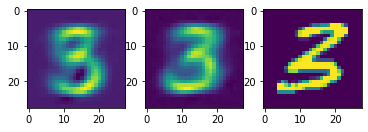

In [ ]:
fig, axs = plt.subplots(1,3)
axs[0].imshow(decoded_img0[9022])
axs[1].imshow(decoded_img1[9022])
axs[2].imshow(X_img[9022])


To calculate the correlation between trials before doing anyting to the data

In [ ]:
X_img = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dim_reduc_project/AE_plain/MNIST/X_test.csv', header=None ).values
X_corr = np.corrcoef(X_img)
diag_ind = range(X_corr.shape[0])
X_corr_off_diag = np.copy(X_corr)
X_corr_off_diag[diag_ind, diag_ind]=0 # removing the auto-correlation
# the diagonal mean for the input is always "1"
X_corr_off_diag_mean = sum(sum(X_corr_off_diag))/(X_corr.size-X_corr.shape[0]) # off diagonal correlation which is 0.3 

In [ ]:
#now we want to calculate the correlation between the classes NOT THE TRIALS
y_img = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dim_reduc_project/AE_plain/MNIST/y_test.csv', header=None ).values
#X_corr_class
categs = np.unique(y_img)
len_categs = len(categs)
X_corr_categ = np.zeros((len_categs,len_categs))
for categx in categs:
  for categy in categs:
    indx = np.where(y_img==categx)
    X_corr_class = X_corr_off_diag[indx[0],:]
    indy = np.where(y_img==categy)
    X_corr_class = X_corr_class[:,indy[0]]
    if categx==categy:
      X_corr_categ[int(categx), int(categy)] = sum(sum(X_corr_class))/(X_corr_class.size-X_corr_class.shape[0])
    else:
       X_corr_categ[int(categx), int(categy)] = sum(sum(X_corr_class))/X_corr_class.size


In [ ]:
print (X_corr_off_diag_mean, np.diag(X_corr_categ).mean()) # between and within class correlation

0.3063302083843259 0.45503698268327303


In [ ]:
y_test = (y_img.astype(str).T).reshape(10000)
categ = np.unique(y_test)
num_trials = len(y_test)
class_matrix_corr = class_diagonal(categ, X_corr_off_diag, num_trials, y_test)


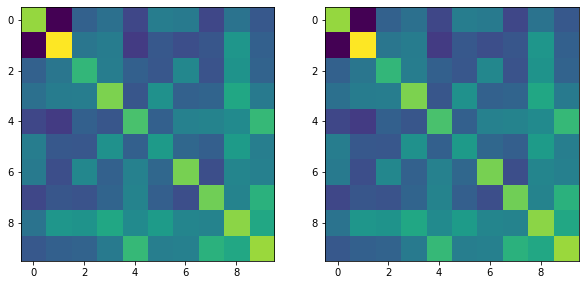

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].imshow(X_corr_categ)
axs[1].imshow(class_matrix_corr)

In [ ]:
def load_data(dim=20):

    #BN = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dim_reduc_project/AE_plain/CIFAR10/BN_dim_'+str(dim)+'.csv', header=None ).values
    #decoded_img = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dim_reduc_project/AE_plain/CIFAR10/decoded_img_'+str(dim)+'.csv', header=None ).values
    
    decoded_img = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dim_reduc_project/AE_plain/MNIST/decoded_num_'+str(dim)+'.csv', header=None ).values
    BN = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dim_reduc_project/AE_plain/MNIST/BN_dim_'+str(dim)+'.csv', header=None ).values

    return(decoded_img, BN)

Function for calculating the between class correlation

In [ ]:
def class_diagonal(categ, corr, num_trials, test_label):

  diag_index = range(num_trials) # to find the index of the diagonals of the test-set matrix
  corr_zero = np.copy(corr)
  corr_zero[diag_index, diag_index]=0 # to remove the auto-correlaiton of the trials
  corr_df = pd.DataFrame(corr_zero) # turning it to DataFrame to make my life easier by ALOT
  corr_df.columns=test_label # to name the columns of the correlation
  corr_df.index = test_label # to name the rows of the correlation
  unique_class = np.unique(test_label) # to find what uniqw classes we have in the test-set
  class_matrix_corr = np.zeros((len(unique_class),len(unique_class))) # this is the correlation of the mean values of the classes
  #trial_matrix_corr = np.zeros(corr.shape) # this is the correlation of every trials based on the arranged categories
  #trial_matrix_corr =np.zeros(corr.shape) # this is the correlation of every trials based on the arranged categories

  for i, row in enumerate(categ):
    for j, column in enumerate(categ):
      #trial_matrix_corr [row, column]=  corr_df.loc[row][column]
      if row==column:
        n_examples = np.sqrt(corr_df.loc[row][column].size) # this is for the case of autocorrelation that we have already put zeros for them so it is fair to not consider them while getting the mean
        #print( row + ' = ' + str(n_examples) + ' trials')
        class_matrix_corr [i,j] = sum(sum(corr_df.loc[row][column]))/(n_examples**2 - n_examples)
      else:
        class_matrix_corr [i,j]= corr_df.loc[row][column].mean().mean()
  return(class_matrix_corr)

Main body of the code

In [ ]:
def my_function (A, B):
  iter = A.shape[0]
  shap = A.shape
  pairwise_dist = np.ones((iter,iter))
  for i in range(iter):
    sample_mat = np.ones((iter,1))*A[i,:]
    dist = np.sqrt(np.mean((sample_mat-B)**2, axis=1))
    if (i%1000) == 0:
      print(i)

    pairwise_dist[:,i] = dist
  return pairwise_dist

In [ ]:
def EDM(A,B):
  p1=np.sum(A**2, axis=1)[:, np.newaxis]
  p2=np.sum(B**2, axis=1)
  p3=-2*np.dot(A,B.T)
  return np.round(np.sqrt(p1+p2+p3), 2)

In [ ]:
(X_train, y_train), (X_test2, y_test2) = mnist.load_data()

In [ ]:
#(X_train, y_train), (X_test2, y_test2) = cifar10.load_data()
(X_train, y_train), (X_test2, y_test2) = mnist.load_data()
#accuracy = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dim_reduc_project/AE_plain/CIFAR10/accuVsdim.csv', header=None ).values
#X_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dim_reduc_project/AE_plain/CIFAR10/X_test.csv', header=None ).values

accuracy = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dim_reduc_project/AE_plain/MNIST/accuVsdim.csv', header=None ).values
X_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dim_reduc_project/AE_plain/MNIST/X_test.csv', header=None ).values

y_test = (y_test2.astype(str).T).reshape(10000)
dims = [1500, 1000, 500, 250, 200, 150, 100, 60, 50, 30, 20, 15, 10, 5, 2] # mdimension of the BottleNeck

corr_list = [] # a list of correlaion of the decoded examplars vs actual imput for subject i (900x900)
corr_class_list = [] # a list of correlation of the categoreies for VT and decoded (40x40)
corr_BN_class_list = [] # a list of correlation of the categoreies for BN(40x40)
corr_BN_class_list_new = [] # a list of correlation of the categoreies for BN(40x40) based on "to calculate the "diag_corr - off_diag_corr"
categ = np.unique(y_test)
num_trials = len(y_test)
for dim in dims:
    [decoded_img, BN] = load_data(dim)
    corr0 = np.corrcoef(X_test, decoded_img)
    indx = int(corr0.shape[0]/2) 
    corr=corr0[indx:,:indx] # we want only the part of the correlation matrix between the X_test and decoded_img
    #dist = cdist(X_test, decoded_img, metric='euclidean')
    #dist = EDM(X_test,decoded_img)
    #corr = dist

    diagonal_corr_mean= np.diagonal(corr).mean()
    corr_list.append(diagonal_corr_mean) # listing the mean of the diagonal of correlation for each dimension
    
    class_matrix_corr = class_diagonal(categ, corr, num_trials, y_test)
    diagonal_class_corr_mean = np.diagonal(class_matrix_corr).mean()
    corr_class_list.append(diagonal_class_corr_mean) # the mean correlation of the the diagonal based on the categories (not examplars) for VT input to decoded VT output
    #corr_dist = cdist(BN, BN, metric='euclidean')
    #corr_dist = EDM(BN, BN)
    #corr_BN = corr_dist
    corr_BN = np.corrcoef(BN) 
    class_matrix_corr_BN = class_diagonal(categ, corr_BN, num_trials, y_test)
    diagonal_class_corr_BN_mean = np.diagonal(class_matrix_corr_BN).mean()
    corr_BN_class_list.append(diagonal_class_corr_BN_mean) # the mean correlation of the the diagonal based on the categories (not examplars) for BN

    #to calculate the off_diag_corr"
    off_diag_indx = np.where(~np.eye(class_matrix_corr_BN.shape[0],dtype=bool))
    diagonal_matrix_corr_off_diag_mean = class_matrix_corr_BN[off_diag_indx].mean()
    diagonal_class_corr_BN_mean_new = diagonal_class_corr_BN_mean - diagonal_matrix_corr_off_diag_mean
    corr_BN_class_list_new.append(diagonal_class_corr_BN_mean_new) # the mean correlation of the the "digaonal - off_diagonal" based on the categories (not examplars) for BN


    fig, (ax1, ax2) = plt.subplots(1,2)
    #ax1.imshow(class_matrix_corr, vmin = 0, vmax =0.9)
    #ax2.imshow(class_matrix_corr_BN, vmin = 0, vmax =0.9)
    ax1.imshow(class_matrix_corr)
    ax2.imshow(class_matrix_corr_BN)
    fig.suptitle('BN_dim= '+ str(dim))
    ax1.set_title('for VT2VT')
    ax2.set_title('for BN')

In [ ]:
from scipy.spatial.distance import cdist
dist = cdist(X_test, decoded_img, metric='euclidean')

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(1/dist[0:100,0:100])

visualization

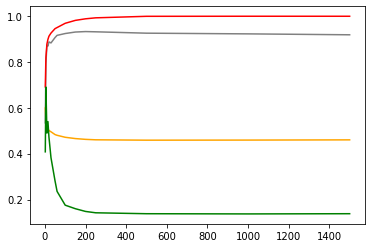

In [ ]:
normalized = (corr_BN_class_list_new-np.min(corr_BN_class_list_new))/(np.max(corr_BN_class_list_new)-np.min(corr_BN_class_list_new)) # to normalize the corr of BN

index_name = ['1500', '1000', '500', '250', '200', '150', '100', '60', '50', '30', '20', '15', '10', '5', '2']
col_name =['dimension','accuracy', 'corr','corr_class', 'corr_BN_class']
dim1 = len(index_name) # number of the diffrent dimesion of BN (here is 15)
dim2 = len(col_name)
AE_plus_CIFAR10 = np.zeros((dim1, dim2))
AE_plus_CIFAR10 = np.asarray([accuracy[:,0], accuracy[:,1], corr_list, corr_class_list, corr_BN_class_list_new]).T
DataFrame(AE_plus_CIFAR10,index=index_name, columns=col_name).to_csv('/content/gdrive/MyDrive/Colab Notebooks/dim_reduc_project/AE_plain/plain_meta_data/MNIST_metadata.csv')    
plt.figure()

plt.plot(accuracy[:,0], accuracy[:,1], c= 'grey')

plt.plot(accuracy[:,0], corr_list, c='red')
plt.plot(accuracy[:,0], corr_class_list, c='orange')

plt.plot(accuracy[:,0], corr_BN_class_list, c='green')
#plt.plot(accuracy[:,0], corr_BN_class_list_new, c='black')
#plt.xlim([0,200])